##Homework 08:

* María Paula Rubiano 

a) Implement Euler procedure numerically to find $y(x)$ from:

$\frac{dy}{dx} = yx^2 -1.2y$

* the initial condition is: $y(0)=1$ over the interval $[0,2]$
* the range of x is actually the interval $[0,2]$
* plot the $y(x)$ for $h=0.5$
* on the same plot compare it with the analytical solution of this differential equation, which is: 

$y(x) = e^{x^3/3 -1.2x}$

HINTS: 

* think of the problem in terms of vectors $x$ and $y$
* in the loop refer to the indices of $x_i, y_i$ and the function $f(x_i,y_i)$
* you can use np.arange to define your vector $x$ based on h and range
* you can use np.zeros to initialize $y$, remember to set $y[0]=1$.

*y=np.zeros(len(x))*

$y[0]=1$






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
h = .5
x = np.arange(0,2+h,h) #[0,2]
y = np.zeros(len(x))
y[0] = 1

In [ ]:
for i in range(len(x)-1):
    y[i+1] = y[i] + (y[i] * x[i]**2 - 1.2*y[i])*h

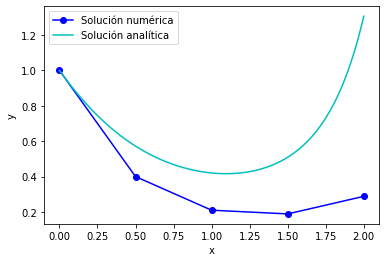

In [ ]:
xvect = np.linspace(0,2,100)
Y = lambda x: np.exp(x**3/3-1.2*x)

fig, ax = plt.subplots(1,1)
ax.plot(x,y, color='blue', marker='o', label='Solución numérica')
ax.plot(xvect, Y(xvect), color='c', label='Solución analítica')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()


ASK YOURSELF:

what if the range changes to $[-2,2]$ and so the initial condition: $x(0)=-2$, $y(0)=0.76$ is your code still working? can you easily change h?

In [ ]:
H = .25
X = np.arange(-2,2+H,H) #[-2,2]
Y1 = np.zeros(len(X))
Y1[0] = .76

In [ ]:
for i in range(len(X)-1):
    Y1[i+1] = Y1[i] + (Y1[i] * X[i]**2 - 1.2*Y1[i])*H

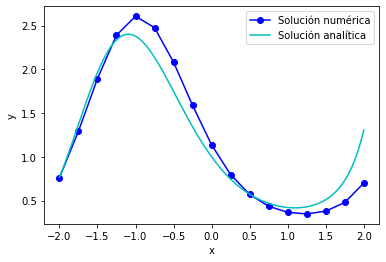

In [ ]:
X1 = np.linspace(-2,2,100)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y1, color='blue', marker='o', label='Solución numérica')
ax.plot(X1, Y(X1), color='c', label='Solución analítica')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

b) write a function euler_int() that accepts four arguments and returns two

x,y=euler_int(func,intrange,h,yinit)

intrange[0,2] where func() is:

def func(xi,yi): return

and test your code by running the cell below. Compare with the plot below

In [ ]:
def func(x,y): return y*x**2-1.2*y

In [ ]:
def euler_int(func,intrange,h,yinit):
  x = np.arange(intrange[0],intrange[1]+h,h)
  y = np.zeros(len(x))
  y[0]=yinit

  for i in range(len(x)-1):
    y[i+1] = y[i] + func(x[i],y[i])*h
  return x,y

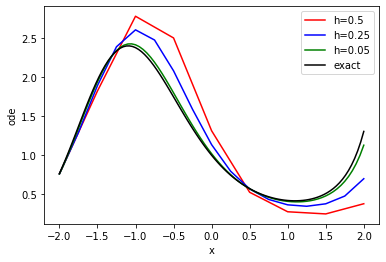

In [ ]:
fig,ax=plt.subplots(1,1)

intrange=[-2.0,2.0]
h=0.5
yinit=0.76
x1,y1=euler_int(func,intrange,h,yinit)
ax.plot(x1,y1,'-r',label='h=0.5')

intrange=[-2.0,2.0]
h=0.25
yinit=0.76
x2,y2=euler_int(func,intrange,h,yinit)
ax.plot(x2,y2,'-b',label='h=0.25')

intrange=[-2.0,2.0]
h=0.05
yinit=0.76
x3,y3=euler_int(func,intrange,h,yinit)
ax.plot(x3,y3,'-g',label='h=0.05')

xexact=np.linspace(intrange[0],intrange[-1],101)
yexact=np.exp((xexact**3)/3-1.2*xexact)
ax.plot(xexact,yexact,'-k',label='exact')

ax.set_xlabel('x')
ax.set_ylabel('ode')
ax.legend()
plt.show()

##Solve the same differential equation:

$\frac{dy}{dx} = yx^2 -1.2y$

with identical initial conditions, but using

* scipy.integrate.odeint()
* scipy.integrate.solve_ivp()

compare the results

In [ ]:
from scipy.integrate import odeint

In [ ]:
def model(y,x): return y*x**2-1.2*y

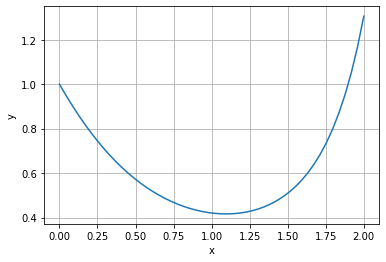

In [ ]:
y0 = 1
X = np.linspace(0,2)
Y = odeint(model,y0,X)

plt.plot(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
sol = solve_ivp(model,[0,2],[1,])
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 1.37309674e+00, 1.63509349e+00,
       2.00000000e+00])
 t_events: None
        y: array([[ 1.        ,  1.        ,  0.99999988,  0.99998768,  0.99875803,
         0.76675067,  0.51539269,  0.08636082, -0.62444259]])
 y_events: None